# Preparación de datos

In [1]:
import numpy as np 
from skimage import io    #Leer imágenes
import matplotlib.pylab as plt

In [2]:
im = io.imread('data/ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajo.jpg')

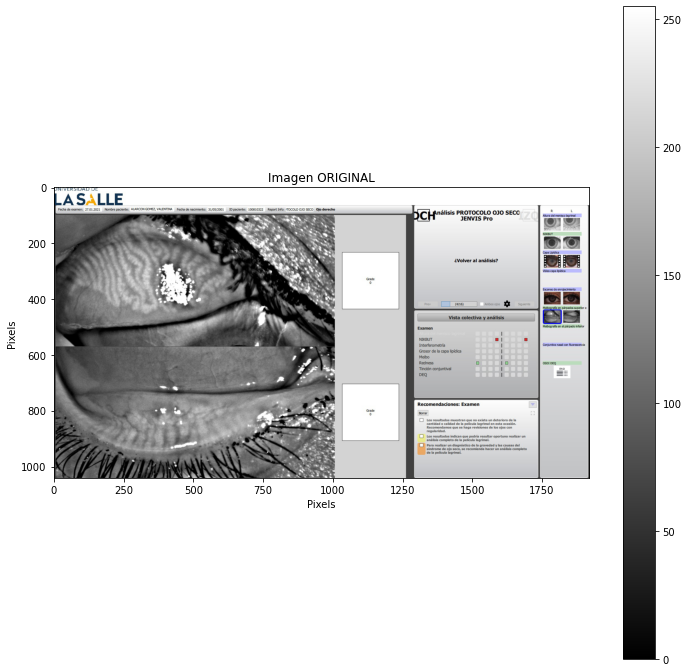

In [3]:
fig= plt.figure(figsize=(12,12))
plt.imshow(im, cmap='gray')
plt.title('Imagen ORIGINAL')
plt.ylabel('Pixels')
plt.xlabel('Pixels')
plt.colorbar()


In [9]:
from PIL import Image

## Primer corte de datos

In [5]:
im=Image.open('data/ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajo.jpg')

top = 571
left = 6
right = 1005
bottom = 1039

im1 = im.crop((left, top, right, bottom) )
#display(im1)

In [179]:
def cut_image(image,class_, mode):
    
    if class_==1:
    
        if mode == 'superior':
            top = 102
            left = 6
            right = 1005
            bottom = 570
            
            #468 altura, 999 ancho
            im1 = image.crop((left, top, right, bottom) )

        elif mode =='inferior':
            top = 571
            left = 6
            right = 1005
            bottom = 1039
            
            #altura 468, ancho 999
            im1 = image.crop((left, top, right, bottom) )
            
            
            
            
    elif class_==2:
        if mode == 'superior':
            top = 166
            left = 99
            right = 999
            bottom = 586
            
            #420 altura, 900 ancho
            im1 = image.crop((left, top, right, bottom) )

        elif mode =='inferior':
            top = 604
            left = 99
            right = 999
            bottom = 1024
            
            #altura 420, ancho 900
            im1 = image.crop((left, top, right, bottom) )
            
        

    return im1    

In [180]:
import os

In [181]:
list_names = []

for name_file in os.listdir('data'):
    # check if current path is a file
    if os.path.isfile(os.path.join('data/', name_file)):
        list_names.append(path)

In [182]:
list_names[:10]

['ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajo.jpg',
 'ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajoOI.jpg',
 'ALARCON LOZANO_LUISA FERNANDA_Binocular_2021_08_21-10_40_38_Visualización análisis lista de trabajo.jpg',
 'ALARCON LOZANO_LUISA FERNANDA_Binocular_2021_08_21-10_40_38_Visualización análisis lista de trabajoOI.jpg',
 'ARAGON HERNANDEZ_VALENTINA_Binocular_2022_05_31-11_27_10_Visualización análisis lista de trabajo.jpg',
 'ARAGON HERNANDEZ_VALENTINA_Binocular_OIe trabajo.jpg',
 'ARCHILA_ORFA_Binocular_2020_03_02-16_44_27_Visualización análisis lista de trabajo.jpg',
 'ARCHILA_ORFA_Binocular_2020_03_02-16_44_27_Visualización análisis lista de trabajoOI.jpg',
 'ARENAS VERA_ADRIANA MARIA_Binocular_2022_06_01-13_18_24_Visualización análisis lista de trabajo.jpg',
 'ARENAS VERA_ADRIANA MARIA_Binocular_2022_06_01-13_18_24_Visualización análisis lista de trabajo.png']

In [183]:
import re

In [184]:
pattern = r'(.+_Binocular_.+)'

x = re.findall(pattern , list_names[0] )
x[0]

'ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajo.jpg'

In [173]:
files_bin =  [ re.findall(pattern, x) for x in list_names]
files_bin_flatten = [ name[0] for name in files_bin if len(name)!=0 ]
files_bin_flatten[:10]

['ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajo.jpg',
 'ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajoOI.jpg',
 'ALARCON LOZANO_LUISA FERNANDA_Binocular_2021_08_21-10_40_38_Visualización análisis lista de trabajo.jpg',
 'ALARCON LOZANO_LUISA FERNANDA_Binocular_2021_08_21-10_40_38_Visualización análisis lista de trabajoOI.jpg',
 'ARAGON HERNANDEZ_VALENTINA_Binocular_2022_05_31-11_27_10_Visualización análisis lista de trabajo.jpg',
 'ARAGON HERNANDEZ_VALENTINA_Binocular_OIe trabajo.jpg',
 'ARCHILA_ORFA_Binocular_2020_03_02-16_44_27_Visualización análisis lista de trabajo.jpg',
 'ARCHILA_ORFA_Binocular_2020_03_02-16_44_27_Visualización análisis lista de trabajoOI.jpg',
 'ARENAS VERA_ADRIANA MARIA_Binocular_2022_06_01-13_18_24_Visualización análisis lista de trabajo.jpg',
 'ARENAS VERA_ADRIANA MARIA_Binocular_2022_06_01-13_18_24_Visualización análisis lista de trabajo.png']

In [175]:
class_ = 1
mode = 'superior'

for name in files_bin_flatten:
    path_file= f'data/{name}'
    im = Image.open(path_file)
    im_cut = cut_image(im, class_ = class_ ,mode =mode)   
    im_cut.save( f'data/class_{class_}/{mode}/{name}' )

## Recortando los que están en diferente formato 

In [157]:
position_of_elements_without_bionocular = [ position for position, name in enumerate(files_bin) if len(name)==0 ]

In [165]:
name_images_class_2 = [ list_names[i] for i in position_of_elements_without_bionocular ]
name_images_class_2

['ARIZA GUERREO_KATERIN _Left_2021_02_25-08_46_20_Visión General MeiboOI.jpg',
 'ARIZA GUERREO_KATERIN _Right_2021_02_25-08_45_29_Visión General Meibo.jpg',
 'ARRIETA AVILA_ANDREA CAROLINA_Right_2019_10_23-10_40_21_Visión General Meibo.jpg',
 'BASTIAS MONROY_DIANA JUANITA_Left_2020_11_11-14_08_16_Visión General MeiboOI.jpg',
 'BASTIAS MONROY_DIANA JUANITA_Right_2020_11_11-14_05_44_Visión General Meibo.jpg']

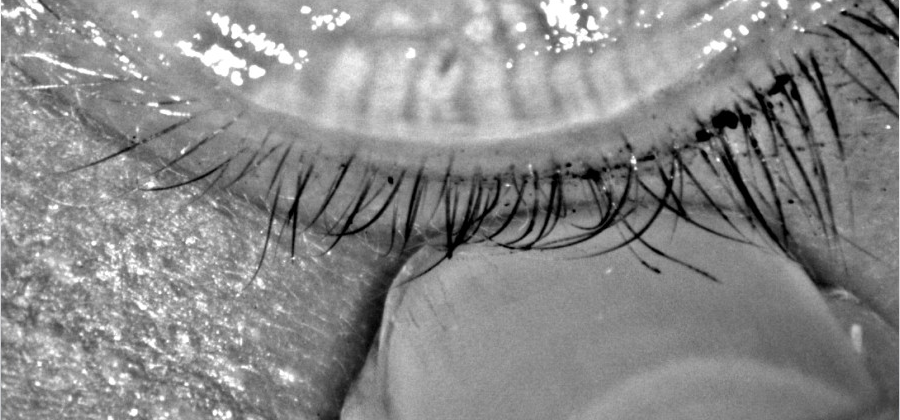

In [176]:
im=Image.open('data/ARIZA GUERREO_KATERIN _Left_2021_02_25-08_46_20_Visión General MeiboOI.jpg')

top = 604
left = 99
right = 999
bottom = 1024

im1 = im.crop((left, top, right, bottom) )
display(im1)

In [185]:
class_ = 2
mode = 'inferior'

for name in name_images_class_2:
    path_file= f'data/{name}'
    im = Image.open(path_file)
    im_cut = cut_image(im, class_ = class_ ,mode =mode)   
    im_cut.save( f'data/class_{class_}/{mode}/{name}' )

## 2. Detección de bordes

In [4]:
import skimage
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [7]:
from skimage.color import rgb2gray

In [28]:
def detect_ridges(gray, sigma=1.0):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(nrows=n, sharey=True, figsize=(10,10))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

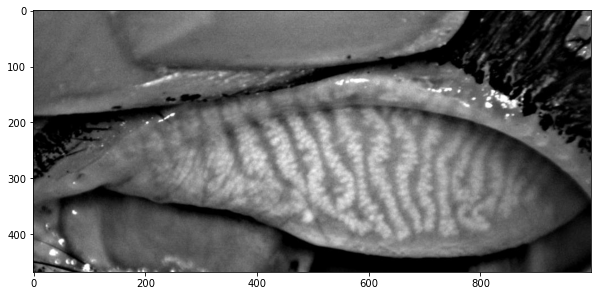

In [70]:
src_path = 'data/class_1/superior/ALARCON GOMEZ_VALENTINA_Binocular_2021_01_27-13_40_39_Visualización análisis lista de trabajoOI.jpg'

img = io.imread(src_path)
grayscale = rgb2gray(img)

plt.figure(figsize = (10,10))
plt.imshow(grayscale, cmap=plt.cm.gray)

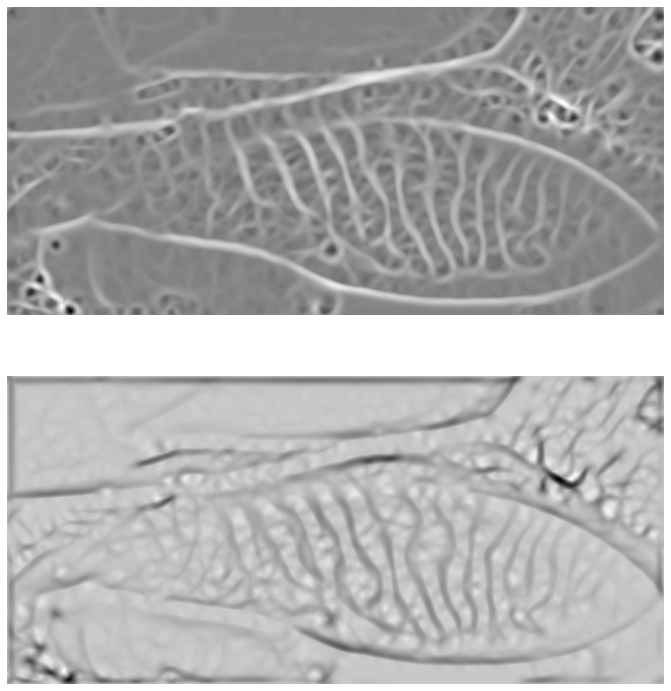

In [74]:
a, b = detect_ridges(grayscale, sigma=6)
plot_images( a, b)

## Probando con Canny

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

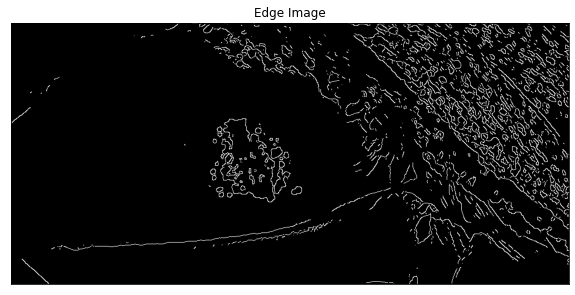

In [59]:
blur = cv2.GaussianBlur(img, (5,5), 0)
edges = cv2.Canny(blur,120,125)

plt.figure(figsize=(10,10))
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

https://www.packt.com/opencv-detecting-edges-lines-shapes/

https://www.youtube.com/watch?v=XfDkg3z3BCg

https://imagej.net/plugins/segmentation-editor

https://stackoverflow.com/questions/45322630/how-to-detect-lines-in-opencv
